In [28]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
from networkx.algorithms.bipartite.basic import density

matplotlib.style.use('ggplot')
%matplotlib inline
import seaborn as sns
from scipy.stats import gaussian_kde

from numpy import linspace,hstack
from pylab import plot,show,hist


import os

In [29]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans


### Загрузка данных и EDA

In [30]:
df = pd.read_csv('Econom_Cities_data.csv', sep=';')

In [31]:
df

,City,Work,Price,Salary
0,Amsterdam,1714,"65,6",49
1,Athens,1792,"53,8","30,4"
2,Bogota,2152,"37,9","11,5"
3,Bombay,2052,"30,3","5,3"
4,Brussels,1708,"73,8","50,5"
5,Buenos_Aires,1971,"56,1","12,5"
6,Cairo,-9999,"37,1",-9999
7,Caracas,2041,61,"10,9"
8,Chicago,1924,"73,9","61,9"
9,Copenhagen,1717,"91,3","62,9"


In [32]:
print(df.shape)
df.info()

(48, 4)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   City    48 non-null     object
 1   Work    48 non-null     int64 
 2   Price   48 non-null     object
 3   Salary  48 non-null     object
dtypes: int64(1), object(3)
memory usage: 1.6+ KB


In [33]:
df['Price'] = df['Price'].astype(str).str.replace(',', '.').astype(float)
df['Salary'] = df['Salary'].astype(str).str.replace(',', '.').astype(float)

In [34]:
df.describe()

,Work,Price,Salary
count,48.000000,48.000000,48.000000
mean,1384.958333,68.860417,-378.727083
std,2404.897007,21.784659,2027.338052
min,-9999.000000,30.300000,-9999.000000
25%,1740.750000,49.650000,12.250000
50%,1834.500000,70.500000,40.300000
75%,1972.750000,81.700000,58.700000
max,2375.000000,115.500000,100.000000


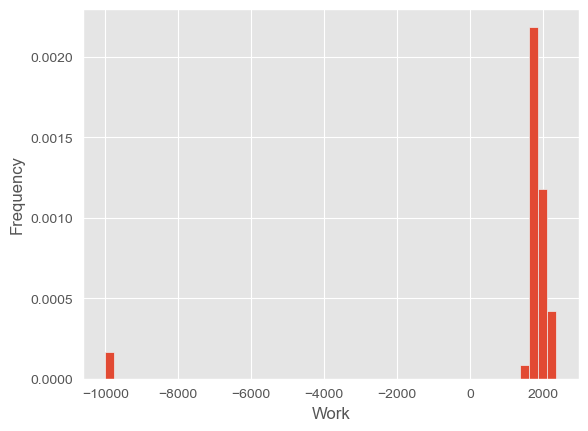

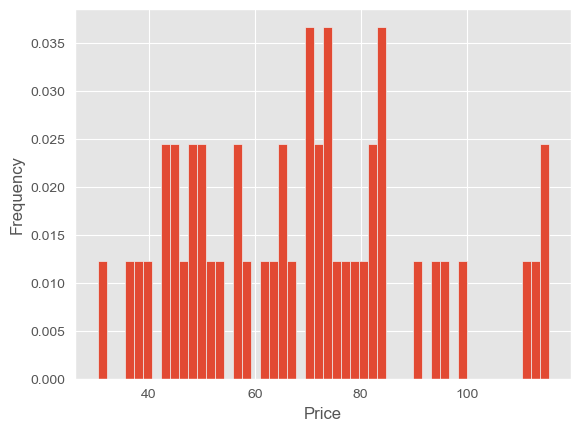

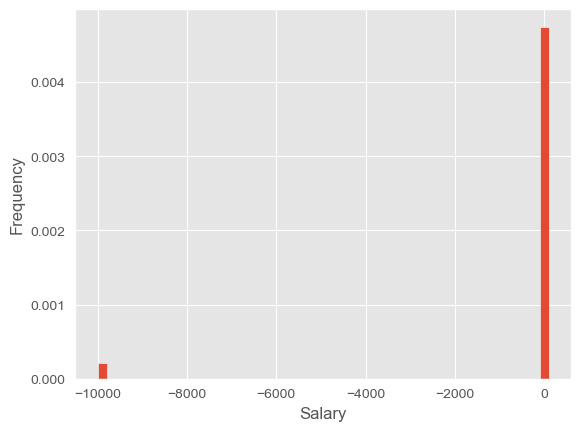

In [35]:
for col in df.columns:
    if col != 'City':
        density = gaussian_kde(df[col])
        plt.figure()
        plt.hist(df[col], bins=50, density=True)
        # plt.plot(linspace(max(df[col]), min(df[col]), 1000), density(linspace(max(df[col]), min(df[col]), 1000)), 'b')
        plt.xlabel(col)
        plt.ylabel('Frequency')
        plt.show()
    

In [36]:
df_cleared = df.query('Work> 0 and Salary >  0')

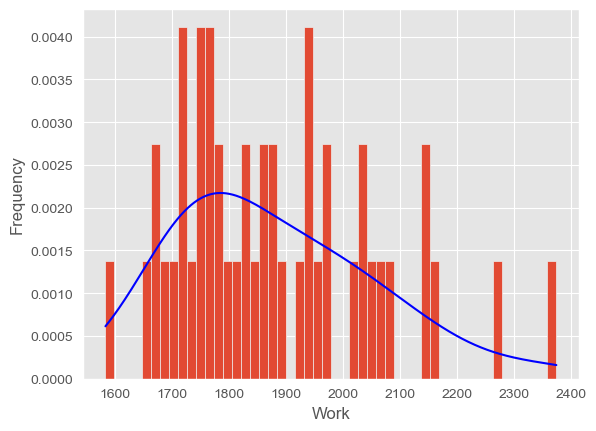

In [37]:
density = gaussian_kde(df_cleared['Work'], bw_method=0.5)
plt.figure()
plt.hist(df_cleared['Work'], bins=50, density=True)
plt.plot(linspace(max(df_cleared['Work']), min(df_cleared['Work']), 1000), density(linspace(max(df_cleared['Work']), min(df_cleared['Work']), 1000)), 'b')
plt.xlabel('Work')
plt.ylabel('Frequency')
plt.show()

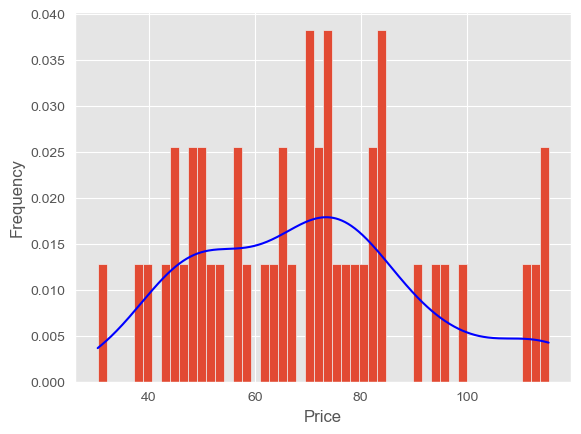

In [38]:
density = gaussian_kde(df_cleared['Price'], bw_method=0.4)
plt.figure()
plt.hist(df_cleared['Price'], bins=50, density=True)
plt.plot(linspace(max(df_cleared['Price']), min(df_cleared['Price']), 1000), density(linspace(max(df_cleared['Price']), min(df_cleared['Price']), 1000)), 'b')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

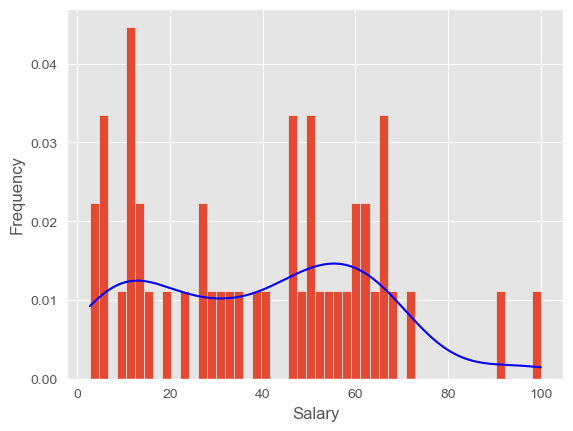

In [39]:
density = gaussian_kde(df_cleared['Salary'], bw_method=0.4)
plt.figure()
plt.hist(df_cleared['Salary'], bins=50, density=True)
plt.plot(linspace(max(df_cleared['Salary']), min(df_cleared['Salary']), 1000), density(linspace(max(df_cleared['Salary']), min(df_cleared['Salary']), 1000)), 'b')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.show()

In [40]:
df['Work'] = df['Work'].apply(lambda x : x if x >= 0 else df_cleared['Work'].median())
df['Salary'] = df['Salary'].apply(lambda x : x if x >= 0 else df_cleared['Salary'].median())

### Масштабирование признаков

In [41]:
df_without_names = df[['Work', 'Price', 'Salary']]


In [42]:
type(df_without_names)

pandas.core.frame.DataFrame

In [43]:
# Надо ставить дополнительные скобки, иначе передается Series
from sklearn.compose import ColumnTransformer 
from sklearn.preprocessing import StandardScaler, MinMaxScaler
ct = ColumnTransformer([     
    ("mm", MinMaxScaler(feature_range=(0, 1)), ["Work"]),
    ("mm_1", MinMaxScaler(), ["Price"]),
    ("mm_2", MinMaxScaler(), ["Salary"])     
,
])  

In [44]:
X_prepared = ct.fit_transform(df_without_names)

In [45]:
X_prepared

array([[0.16540404, 0.41431925, 0.47584789],
       [0.26388889, 0.2758216 , 0.28468654],
       [0.71843434, 0.08920188, 0.09044193],
       [0.59217172, 0.        , 0.02672148],
       [0.15782828, 0.51056338, 0.49126413],
       [0.48989899, 0.3028169 , 0.10071942],
       [0.33585859, 0.07981221, 0.42086331],
       [0.57828283, 0.36032864, 0.08427544],
       [0.43055556, 0.51173709, 0.60842754],
       [0.16919192, 0.71596244, 0.61870504],
       [0.22222222, 0.53638498, 0.39773895],
       [0.13888889, 0.5657277 , 0.59095581],
       [0.08459596, 0.51877934, 0.59301131],
       [0.375     , 0.76995305, 0.90030832],
       [0.10606061, 0.97769953, 0.65673176],
       [1.        , 0.39319249, 0.25796506],
       [0.49873737, 0.48826291, 0.44809866],
       [0.33585859, 0.15610329, 0.42086331],
       [0.45707071, 0.24413146, 0.21891059],
       [0.73737374, 0.15492958, 0.07399794],
       [0.25631313, 0.17488263, 0.        ],
       [0.20075758, 0.30399061, 0.16546763],
       [0.

In [46]:
df_scaled = pd.DataFrame(X_prepared)
df_scaled.rename(columns={0: 'Work', 1: 'Price', 2: 'Salary'}, inplace=True)

In [47]:
df_scaled.shape

(48, 3)

In [48]:
df_scaled.max()

Work      1.0
Price     1.0
Salary    1.0
dtype: float64

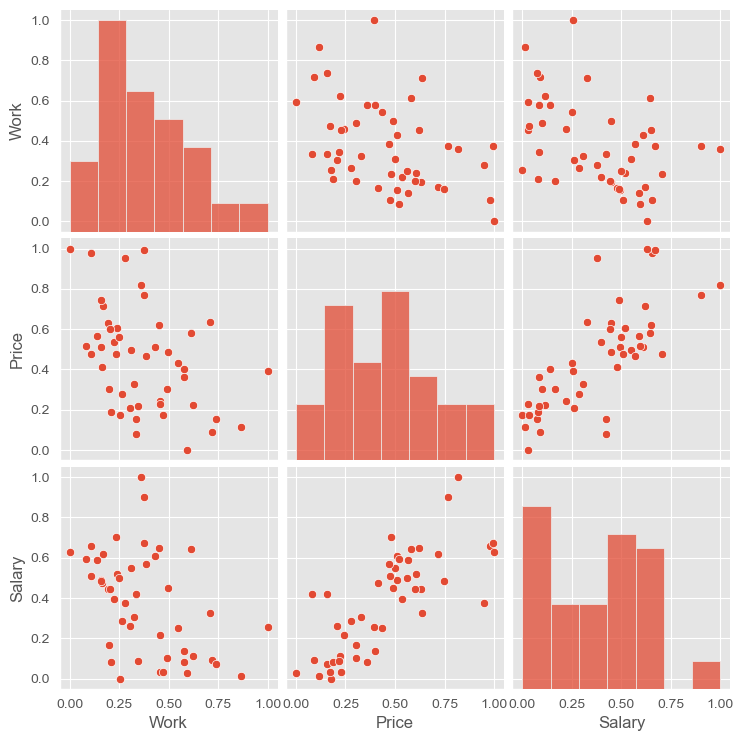

In [49]:
sns.pairplot(df_scaled)

In [50]:
df_scaled['City'] =  df['City']

In [51]:
df_scaled

,Work,Price,Salary,City
0,0.165404,0.414319,0.475848,Amsterdam
1,0.263889,0.275822,0.284687,Athens
2,0.718434,0.089202,0.090442,Bogota
3,0.592172,0.000000,0.026721,Bombay
4,0.157828,0.510563,0.491264,Brussels
5,0.489899,0.302817,0.100719,Buenos_Aires
6,0.335859,0.079812,0.420863,Cairo
7,0.578283,0.360329,0.084275,Caracas
8,0.430556,0.511737,0.608428,Chicago
9,0.169192,0.715962,0.618705,Copenhagen


#### Иерархический анализ

In [52]:
link = linkage(df_scaled[['Work', 'Price', "Salary"]], 'ward', 'euclidean')


In [53]:
link

array([[2.20000000e+01, 3.50000000e+01, 3.19198381e-02, 2.00000000e+00],
       [2.80000000e+01, 4.60000000e+01, 5.20074286e-02, 2.00000000e+00],
       [2.70000000e+01, 3.00000000e+01, 5.90550404e-02, 2.00000000e+00],
       [4.00000000e+00, 4.10000000e+01, 6.37259619e-02, 2.00000000e+00],
       [7.00000000e+00, 3.90000000e+01, 6.67101287e-02, 2.00000000e+00],
       [2.00000000e+00, 1.90000000e+01, 7.03508057e-02, 2.00000000e+00],
       [1.10000000e+01, 1.20000000e+01, 7.18059569e-02, 2.00000000e+00],
       [8.00000000e+00, 4.50000000e+01, 7.34715697e-02, 2.00000000e+00],
       [6.00000000e+00, 1.70000000e+01, 7.62910798e-02, 2.00000000e+00],
       [1.00000000e+00, 3.20000000e+01, 8.36500176e-02, 2.00000000e+00],
       [2.00000000e+01, 3.60000000e+01, 9.36777469e-02, 2.00000000e+00],
       [0.00000000e+00, 5.10000000e+01, 1.02114155e-01, 3.00000000e+00],
       [1.30000000e+01, 4.70000000e+01, 1.11730621e-01, 2.00000000e+00],
       [1.00000000e+01, 4.80000000e+01, 1.11882430e

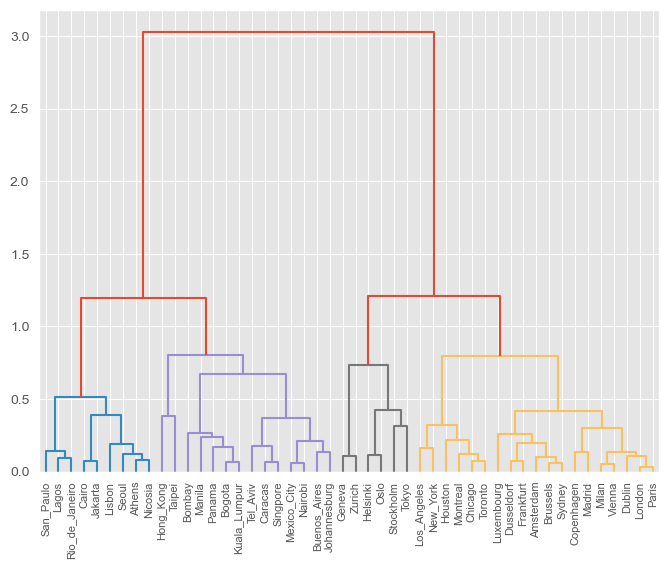

In [54]:
fig = plt.figure(figsize=(8,6))
dn = dendrogram(link, labels= df_scaled['City'].tolist(), color_threshold=0.9)

In [55]:
df_scaled['cluster'] = fcluster(link, 0.9, criterion='distance')

In [56]:
df_scaled

,Work,Price,Salary,City,cluster
0,0.165404,0.414319,0.475848,Amsterdam,4
1,0.263889,0.275822,0.284687,Athens,1
2,0.718434,0.089202,0.090442,Bogota,2
3,0.592172,0.000000,0.026721,Bombay,2
4,0.157828,0.510563,0.491264,Brussels,4
5,0.489899,0.302817,0.100719,Buenos_Aires,2
6,0.335859,0.079812,0.420863,Cairo,1
7,0.578283,0.360329,0.084275,Caracas,2
8,0.430556,0.511737,0.608428,Chicago,4
9,0.169192,0.715962,0.618705,Copenhagen,4


In [57]:
df_scaled[['Work', 'Price', "Salary", 'cluster']].groupby('cluster').mean()

,Work,Price,Salary
cluster,,,
1,0.286616,0.214658,0.225534
2,0.630501,0.267857,0.125532
3,0.249369,0.918427,0.705036
4,0.263889,0.554299,0.539136


#### K-means

#### DBSCAN

### ВЫВОД: